<a href="https://colab.research.google.com/github/BaseKan/aiday_training_resources/blob/main/TF_ConvNets/ConvNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introductie



In [3]:
import os
import numpy as np
import pandas as pd
import glob
import shutil
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
y_cat_train = to_categorical(y_train, 10)

In [8]:
y_cat_test = to_categorical(y_test, 10)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
def create_model():
  model = Sequential()

  model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(28,28,1), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model

In [69]:
cnn_model = create_model()

In [70]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [73]:
cnn_model.fit(x=x_train, y=y_cat_train, epochs=5, validation_data=(x_test, y_cat_test), callbacks=[early_stop], batch_size=128)

Epoch 1/5
469/469 [==============================] - 106s 226ms/step - loss: 0.2481 - accuracy: 0.9107 - val_loss: 0.2616 - val_accuracy: 0.9061
Epoch 2/5
469/469 [==============================] - 106s 225ms/step - loss: 0.2216 - accuracy: 0.9187 - val_loss: 0.2589 - val_accuracy: 0.9070
Epoch 3/5
469/469 [==============================] - 107s 228ms/step - loss: 0.1995 - accuracy: 0.9274 - val_loss: 0.2421 - val_accuracy: 0.9110
Epoch 4/5
469/469 [==============================] - 105s 225ms/step - loss: 0.1793 - accuracy: 0.9346 - val_loss: 0.2297 - val_accuracy: 0.9182
Epoch 5/5
469/469 [==============================] - 106s 225ms/step - loss: 0.1612 - accuracy: 0.9410 - val_loss: 0.2253 - val_accuracy: 0.9210


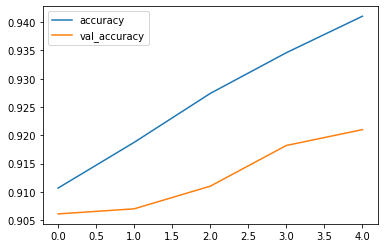

In [78]:
loss_df = pd.DataFrame(cnn_model.history.history)

loss_df[['accuracy', 'val_accuracy']].plot()

# Dataset

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

classes = [d for d in os.listdir(val_dir) if os.path.isdir(os.path.join(train_dir, d))]

We splitsen de validatieset in een validatieset en een testset.


In [ ]:
for cl in classes:
  img_path = os.path.join(val_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  val, test = images[:round(len(images)*0.5)], images[round(len(images)*0.5):]

  for t in test:
    if not os.path.exists(os.path.join(base_dir, 'test', cl)):
      os.makedirs(os.path.join(base_dir, 'test', cl))
    shutil.move(t, os.path.join(base_dir, 'test', cl))

In [ ]:
print("{}: {} train images".format(classes[0], len(os.listdir(os.path.join(train_dir, classes[0])))))
print("{}: {} train images".format(classes[1], len(os.listdir(os.path.join(train_dir, classes[1])))))
print("{}: {} validation images".format(classes[0], len(os.listdir(os.path.join(val_dir, classes[0])))))
print("{}: {} validation images".format(classes[1], len(os.listdir(os.path.join(val_dir, classes[1])))))
print("{}: {} test images".format(classes[0], len(os.listdir(os.path.join(test_dir, classes[0])))))
print("{}: {} test images".format(classes[1], len(os.listdir(os.path.join(test_dir, classes[1])))))

We maken een image data generator om de afbeeldingen goed in te kunnen laden. Voor nu normaliseren we enkel de kleuren.

In [ ]:
batch_size = 32
IMG_SHAPE = 150

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
image_gen = ImageDataGenerator(rescale=1/255)

train_data_gen = image_gen.flow_from_directory(directory = train_dir, 
                                               target_size = (IMG_SHAPE, IMG_SHAPE),
                                               batch_size = batch_size,
                                               shuffle = True)

In [ ]:
images = [train_data_gen[0][0][i] for i in range(5)]
plotImages(images)

# Image Augmentation

Horizontal Flip.

In [ ]:
image_gen = ImageDataGenerator(rescale=1/255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(directory = train_dir, 
                                               target_size = (IMG_SHAPE, IMG_SHAPE),
                                               batch_size = batch_size,
                                               shuffle = True)

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Random Rotation.

In [ ]:
image_gen = ImageDataGenerator(rescale=1/255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(directory=train_dir,
                                               target_size = (IMG_SHAPE, IMG_SHAPE),
                                               batch_size = batch_size,
                                               shuffle = True)

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Random zoom.

In [ ]:
image_gen = ImageDataGenerator(rescale = 1/255, zoom_range = 0.5)

train_data_gen = image_gen.flow_from_directory(directory = train_dir, 
                                               target_size = (IMG_SHAPE, IMG_SHAPE),
                                               shuffle = True,
                                               batch_size = batch_size)

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Transfer learning



In [12]:
import tensorflow_datasets as tfds

In [13]:
dataset, info = tfds.load('tf_flowers', as_supervised=True, with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [18]:
dataset_size = info.splits['train'].num_examples
class_names = info.features['label'].names
n_classes = info.features['label'].num_classes

In [20]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load('tf_flowers', split=['train[:10%]', 'train[10%:25%]', 'train[25%:]'], as_supervised=True)

In [22]:
def preprocess(image, label):
  resized_image = tf.image.resize(image, [224,224])
  final_image = tf.keras.applications.xception.preprocess_input(resized_image)
  return final_image, label

In [24]:
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

In [ ]:
base_model = tf.keras.applications.xception.Xception(weights='imagenet', include_top=False)

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation='softmax')(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

83689472/83683744 [==============================] - 1s 0us/step


In [1]:
avg

NameError: ignored

# Exercise

Gebruik de documentatie van [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) om meerdere augmentaties te combineren. Train vervolgens een CNN en probeer een zo goed mogelijke score te halen op de test set.

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1/255)

val_data_gen = image_gen_val.flow_from_directory(directory = val_dir,
                                                 target_size = (IMG_SHAPE, IMG_SHAPE),
                                                 batch_size = batch_size)

image_gen_test = ImageDataGenerator(rescale=1/255)

test_data_gen = image_gen_test.flow_from_directory(directory = val_dir,
                                                   target_size = (IMG_SHAPE, IMG_SHAPE),
                                                   batch_size = batch_size)

In [ ]:
# Jouw code hier